In [108]:
import pandas as pd
import numpy as np
import seaborn as sns

In [109]:
df = pd.read_csv("admission.csv")
df.head(5)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [110]:
#Question 1 (a)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [111]:
#question 1 (c)
df.shape

(500, 9)

In [112]:
#Question 1 (a)
df = df.sample(n=10,replace=True)
df.head(5)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
86,87,315,106,3,4.5,3.5,8.42,0,0.72
447,448,320,108,3,3.5,5.0,8.97,1,0.84
264,265,325,110,2,3.0,2.5,8.76,1,0.75
166,167,302,102,3,3.5,5.0,8.33,0,0.65
249,250,321,111,3,3.5,4.0,8.83,1,0.77


In [113]:
#Question 1 (d)
corr = df.corr()
corr

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,1.000000,0.359095,0.141426,0.368934,0.344279,0.661376,0.811522,0.512293,0.735135
GRE Score,0.359095,1.000000,0.863583,0.617839,0.517140,0.069099,0.262903,0.787358,0.741447
TOEFL Score,0.141426,0.863583,1.000000,0.601745,0.350021,-0.045859,0.220229,0.678744,0.620440
University Rating,0.368934,0.617839,0.601745,1.000000,0.856927,0.597462,0.185599,0.350438,0.761717
SOP,0.344279,0.517140,0.350021,0.856927,1.000000,0.614966,0.172454,0.105661,0.737892
LOR,0.661376,0.069099,-0.045859,0.597462,0.614966,1.000000,0.445801,0.039193,0.632248
CGPA,0.811522,0.262903,0.220229,0.185599,0.172454,0.445801,1.000000,0.519317,0.567558
Research,0.512293,0.787358,0.678744,0.350438,0.105661,0.039193,0.519317,1.000000,0.509409
Chance of Admit,0.735135,0.741447,0.620440,0.761717,0.737892,0.632248,0.567558,0.509409,1.000000


<AxesSubplot:>

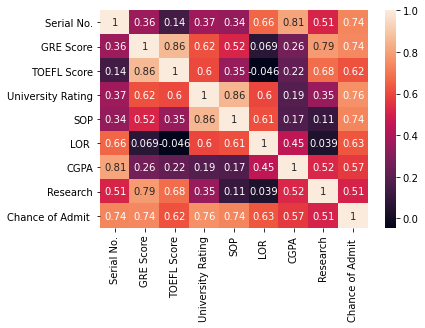

In [114]:
#Question 1 (e)
sns.heatmap(corr, annot=True)

In [115]:
#Question 2
print(df['GRE Score'].min())
print(df['GRE Score'].max())

302
334


In [116]:
df.head(5)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
86,87,315,106,3,4.5,3.5,8.42,0,0.72
447,448,320,108,3,3.5,5.0,8.97,1,0.84
264,265,325,110,2,3.0,2.5,8.76,1,0.75
166,167,302,102,3,3.5,5.0,8.33,0,0.65
249,250,321,111,3,3.5,4.0,8.83,1,0.77


In [117]:
#Question 3
df_grouped_by_unirate = df.groupby("University Rating")
df_grouped_by_unirate.get_group(1)['Serial No.'].count()
df_grouped_by_unirate.groups.keys()
for i in df_grouped_by_unirate.groups.keys():
    print("The percentage of universities having university rating {} are {}".format(i,(df_grouped_by_unirate.get_group(i)['Serial No.'].count()/df.count()['Serial No.'])*100))

The percentage of universities having university rating 1 are 10.0
The percentage of universities having university rating 2 are 20.0
The percentage of universities having university rating 3 are 50.0
The percentage of universities having university rating 4 are 20.0


In [118]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [119]:
#Question 4
df.loc[df['Chance of Admit '] <= 0.80 ] = 0
df.loc[df['Chance of Admit '] > 0.80 ] = 1
df['Chance of Admit '] = df['Chance of Admit '].astype(int)
df.head(5)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
86,0,0,0,0,0.0,0.0,0.0,0,0
447,1,1,1,1,1.0,1.0,1.0,1,1
264,0,0,0,0,0.0,0.0,0.0,0,0
166,0,0,0,0,0.0,0.0,0.0,0,0
249,0,0,0,0,0.0,0.0,0.0,0,0


In [120]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [121]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics



#split dataset in features and target variable
feature_cols = ['GRE score', 'TOEFL Score', 'UniversityRating', 'SOP','LOR','CGPA','ChanceofAdmit']
X = df.drop(['Serial No.','Research'],axis=1)
y = df['Research']

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) 

# Create Decision Tree classifer object
dtc = DecisionTreeClassifier()

# Train Decision Tree Classifer
dtc = dtc.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = dtc.predict(X_test)


# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 1.0


In [122]:
from array import array
from sklearn.ensemble import GradientBoostingClassifier

"""Now we can try setting different learning rates, 
so that we can compare the performance of the classifier's performance at different learning rates."""

learning_rate_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in learning_rate_list:
    gbc = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=2, max_depth=2, random_state=0)
    gbc.fit(X_train, y_train)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gbc.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gbc.score(X_test, y_test)))

Learning rate:  0.05
Accuracy score (training): 1.000
Accuracy score (validation): 1.000
Learning rate:  0.075
Accuracy score (training): 1.000
Accuracy score (validation): 1.000
Learning rate:  0.1
Accuracy score (training): 1.000
Accuracy score (validation): 1.000
Learning rate:  0.25
Accuracy score (training): 1.000
Accuracy score (validation): 1.000
Learning rate:  0.5
Accuracy score (training): 1.000
Accuracy score (validation): 1.000
Learning rate:  0.75
Accuracy score (training): 1.000
Accuracy score (validation): 1.000
Learning rate:  1
Accuracy score (training): 1.000
Accuracy score (validation): 1.000
